Importación de paquetes y funciones útiles

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
plt.style.use('bmh')

Definición de variables y cración de la grilla

In [4]:
a = 2 # largo del plano
b = 4 # ancho del plano
n = 8 # nodos de la grilla
max = 5 # máximo y mínimo del gráfico

# Particiones de los ejes x e y
X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)
Z = np.linspace(-max,max,n)

# Definición de la grilla
x,y,z = np.meshgrid(X,Y,Z)

Definición de las componentes del campo eléctrico y su módulo

In [7]:
def Ex(x,y,z):
    return -np.log(np.abs((np.sqrt((y-b/2)**2+(x-a/2)**2+z**2)+y-b/2))/np.sqrt((x-a/2)**2+z**2))+np.log(np.abs((np.sqrt((y+b/2)**2+(x-a/2)**2+z**2)+y+b/2))/np.sqrt((x-a/2)**2+z**2))+np.log(np.abs((np.sqrt((y-b/2)**2+(x+a/2)**2+z**2)+y-b/2))/np.sqrt((x+a/2)**2+z**2))-np.log(np.abs((np.sqrt((y+b/2)**2+(x+a/2)**2+z**2)+y+b/2))/np.sqrt((x+a/2)**2+z**2))
def Ey(x,y,z):
    return -np.log(np.abs((np.sqrt((y-b/2)**2+(x-a/2)**2+z**2)+x-a/2))/np.sqrt((y-b/2)**2+z**2))+np.log(np.abs((np.sqrt((y-b/2)**2+(x+a/2)**2+z**2)+x+a/2))/np.sqrt((y-b/2)**2+z**2))+np.log(np.abs((np.sqrt((y+b/2)**2+(x-a/2)**2+z**2)+x-a/2))/np.sqrt((y+b/2)**2+z**2))-np.log(np.abs((np.sqrt((y+b/2)**2+(x+a/2)**2+z**2)+x+a/2))/np.sqrt((y+b/2)**2+z**2))
def Ez(x,y,z):
    return np.arctan(((y-b/2)*(x-a/2))/(z*np.sqrt((x-a/2)**2+(y-b/2)**2+z**2)))-np.arctan(((y+b/2)*(x-a/2))/(z*np.sqrt((x-a/2)**2+(y+b/2)**2+z**2)))-np.arctan(((y-b/2)*(x+a/2))/(z*np.sqrt((x+a/2)**2+(y-b/2)**2+z**2)))+np.arctan(((y+b/2)*(x+a/2))/(z*np.sqrt((x+a/2)**2+(y+b/2)**2+z**2)))
def E(x,y,z):
    return np.sqrt(Ex(x,y,z)**2+Ey(x,y,z)**2+Ez(x,y,z)**2)

Creación del gráfico

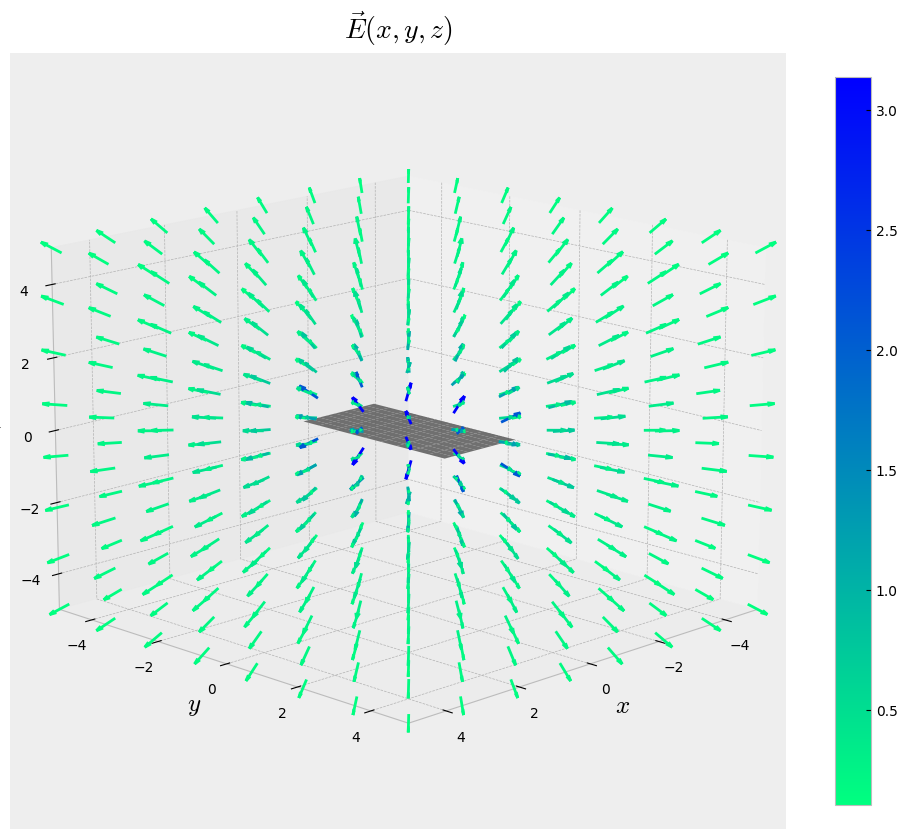

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Magnitud del campo en cada punto
magnitudes = E(x,y,z)

# Se aplana el array de magnitudes a 1D
magnitudes_flat = magnitudes.flatten()

# Se normalizan las magnitudes para el colormap
norm = Normalize(vmin=magnitudes_flat.min(), vmax=magnitudes_flat.max())

# Gráfica del campo con color según la magnitud
q = ax.quiver(x, y, z, 
              Ex(x,y,z)/E(x,y,z), 
              Ey(x,y,z)/E(x,y,z), 
              Ez(x,y,z)/E(x,y,z), 
              length=0.5, 
              pivot='middle', 
              cmap='winter_r',
              array=magnitudes_flat,  # Array aplanado
              norm=norm)

# Límites de los ejes
ax.set_xlim([-max,max])
ax.set_ylim([-max,max])
ax.set_zlim([-max,max])

# Etiquetas de los ejes
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)
ax.set_zlabel('$z$', fontsize=18)

# Título de la gráfica
plt.title('$\\vec{E}(x,y,z)$', fontsize=20, pad=10)

# Se añade el plano cargadoÑ
x_plane = np.linspace(-a/2, a/2, 10)
y_plane = np.linspace(-b/2, b/2, 10)
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
Z_plane = np.zeros_like(X_plane)

ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.9, color='gray')

# Se agrega una barra de colorÑ
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap='winter_r'), ax=ax, shrink=0.75)

# Configuración de la vista
ax.view_init(elev=15, azim=45)
plt.tight_layout()
plt.show()